In [61]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [79]:
data=pd.read_csv("winequality-red.csv",sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [80]:
traincount=int(data.shape[0]*0.8)
traincount

1279

In [81]:
x=data.iloc[:,:4]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.70,0.00,1.9
1,7.8,0.88,0.00,2.6
2,7.8,0.76,0.04,2.3
3,11.2,0.28,0.56,1.9
4,7.4,0.70,0.00,1.9


In [82]:
y=data.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [84]:
classifier=DecisionTreeClassifier()


In [85]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred=classifier.predict(x_test)


In [87]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.5625

In [88]:
from sklearn.tree import export_text

In [89]:
r=export_text(classifier)
print(r)

|--- feature_1 <= 0.53
|   |--- feature_1 <= 0.32
|   |   |--- feature_3 <= 1.65
|   |   |   |--- feature_2 <= 0.36
|   |   |   |   |--- class: 7
|   |   |   |--- feature_2 >  0.36
|   |   |   |   |--- feature_0 <= 7.15
|   |   |   |   |   |--- feature_1 <= 0.22
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_1 >  0.22
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_0 >  7.15
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 0.54
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_2 >  0.54
|   |   |   |   |   |   |   |--- class: 6
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_0 <= 11.65
|   |   |   |   |--- feature_0 <= 11.15
|   |   |   |   |   |--- feature_2 <= 0.27
|   |   |   |   |   |   |--- feature_1 <= 0.20
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_1

[Text(174.15822465573785, 212.91, 'X[1] <= 0.535\ngini = 0.635\nsamples = 1279\nvalue = [8, 40, 544, 527, 149, 11]'),
 Text(63.44116068475785, 203.85, 'X[1] <= 0.317\ngini = 0.64\nsamples = 654\nvalue = [1, 11, 197, 317, 120, 8]'),
 Text(7.676754611596973, 194.79, 'X[3] <= 1.65\ngini = 0.591\nsamples = 139\nvalue = [0, 0, 16, 71, 51, 1]'),
 Text(2.3620783420298377, 185.73, 'X[2] <= 0.36\ngini = 0.405\nsamples = 20\nvalue = [0, 0, 3, 15, 2, 0]'),
 Text(1.5747188946865585, 176.67, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(3.149437789373117, 176.67, 'X[0] <= 7.15\ngini = 0.278\nsamples = 18\nvalue = [0, 0, 3, 15, 0, 0]'),
 Text(1.5747188946865585, 167.60999999999999, 'X[1] <= 0.22\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.7873594473432792, 158.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(2.3620783420298377, 158.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(4.724156684059675, 167.60999999999999, 'X[2] <= 0

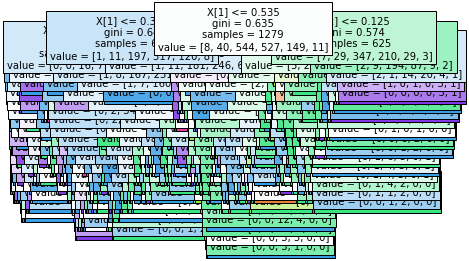

In [90]:
tree.plot_tree(classifier,fontsize=10,filled=True)

In [91]:
def entropy(class_label):
    values,counts=np.unique(class_label,return_counts=True)
    
    for i in range(len(values)):
        entropy=np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))])
    return entropy    

In [75]:
def InfoGain(data,split_attribute_name,class_label="equality"):
    total_entropy=entropy(data[class_label])
    vals,counts=np.unique(data[split_attribute_name],return_counts=True)
    
    for i in range(len(vals)):
        weighted_Entropy=np.sum([(count[i])/np.sum(counts)*entropy(data.where(data[split_attribute_name]==vals[i].dropna()[class_label]))])
        Information_gain=total_entropy - weighted_eentropy
        return Information_gain